# 📊 Bayesian Network 

Bu analiz, `DiscreteBayesianNetwork` kullanılarak futbolcuların pozisyonlarının tahmin edilmesini ve model performanslarının ölçülmesini içermektedir.

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import BayesianEstimator
from pgmpy.inference import VariableElimination

# Veriyi oku
df = pd.read_csv("football-player-position.csv")
df.dropna(inplace=True)

# Hedef ve öznitelikleri belirle
target_col = 'class'
features = [col for col in df.columns if col != target_col]

# Etiket kodlama
le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col])

# Bayes ağı modelini oluştur
model = DiscreteBayesianNetwork([(target_col, feature) for feature in features])
model.fit(df, estimator=BayesianEstimator)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'N', 'Height': 'N', 'Matches': 'N', 'Minutes/Match': 'N', 'Goals/Match': 'N', 'Assists/Match': 'N', 'Yellow Cards/Match': 'N', 'Red Cards/Match': 'N', 'Shots/Match': 'N', 'Pass Success Rate': 'N', 'Aerials Won': 'N', 'class': 'N'}


In [14]:
# Örnek oyuncu verisi ve tahmin işlemi
inference = VariableElimination(model)
sample_player = {
    'Age': 24,
    'Height': 180,
    'Goals/Match': 0.2,
    'Shots/Match': 1.0,
    'Pass Success Rate': 82.0
}
result = inference.map_query(variables=[target_col], evidence=sample_player)
print("Tahmin edilen pozisyon:", le.inverse_transform([result[target_col]])[0])

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

Tahmin edilen pozisyon: Midfielder


##  Pozisyon Dağılımı

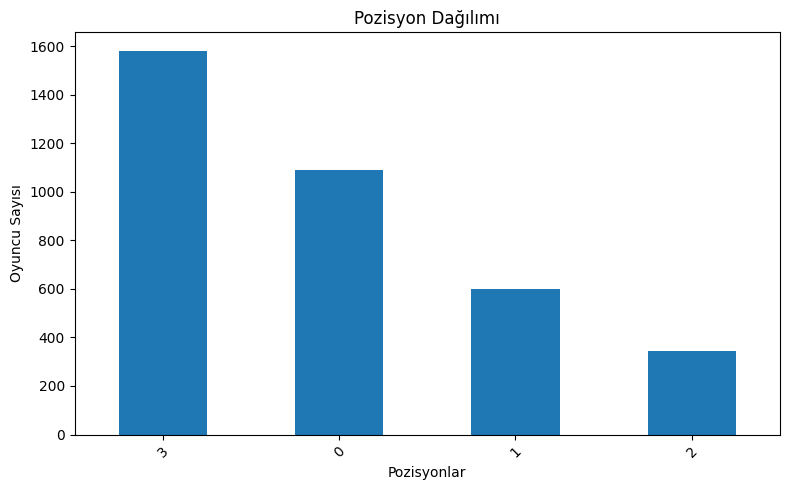

In [15]:
import matplotlib.pyplot as plt

df['class'].value_counts().plot(kind='bar', figsize=(8,5), title='Pozisyon Dağılımı')
plt.xlabel("Pozisyonlar")
plt.ylabel("Oyuncu Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  Özellik Korelasyonu

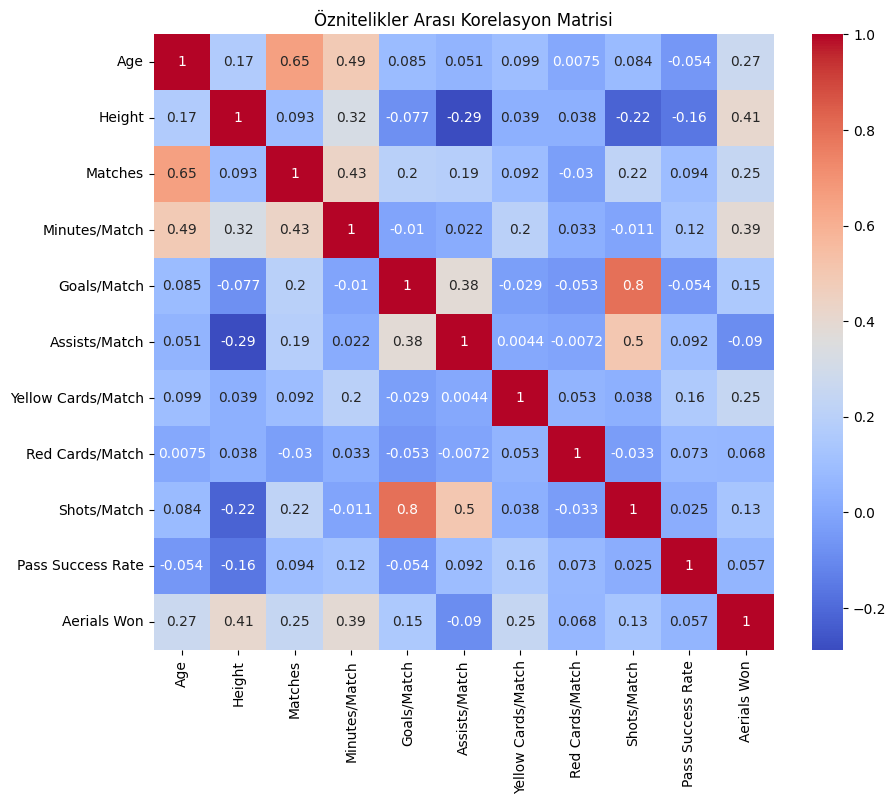

In [16]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Öznitelikler Arası Korelasyon Matrisi")
plt.show()

## Confusion Matrix (Bayesian Tahmin)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it

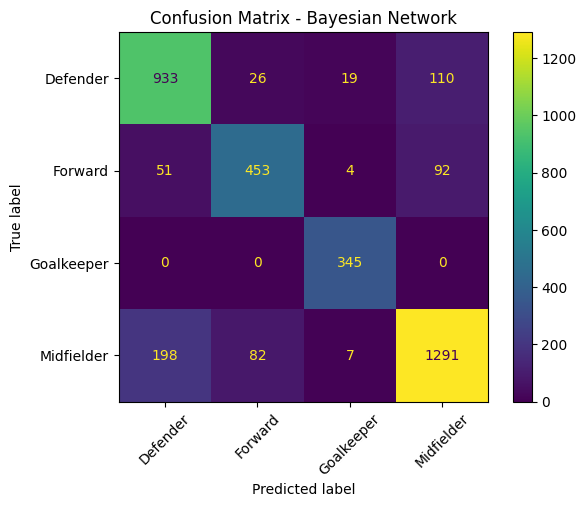

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = df[target_col]
y_pred = [inference.map_query(variables=[target_col], evidence={k: row[k] for k in sample_player.keys()})[target_col]
          for _, row in df.iterrows()]

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix - Bayesian Network")
plt.show()

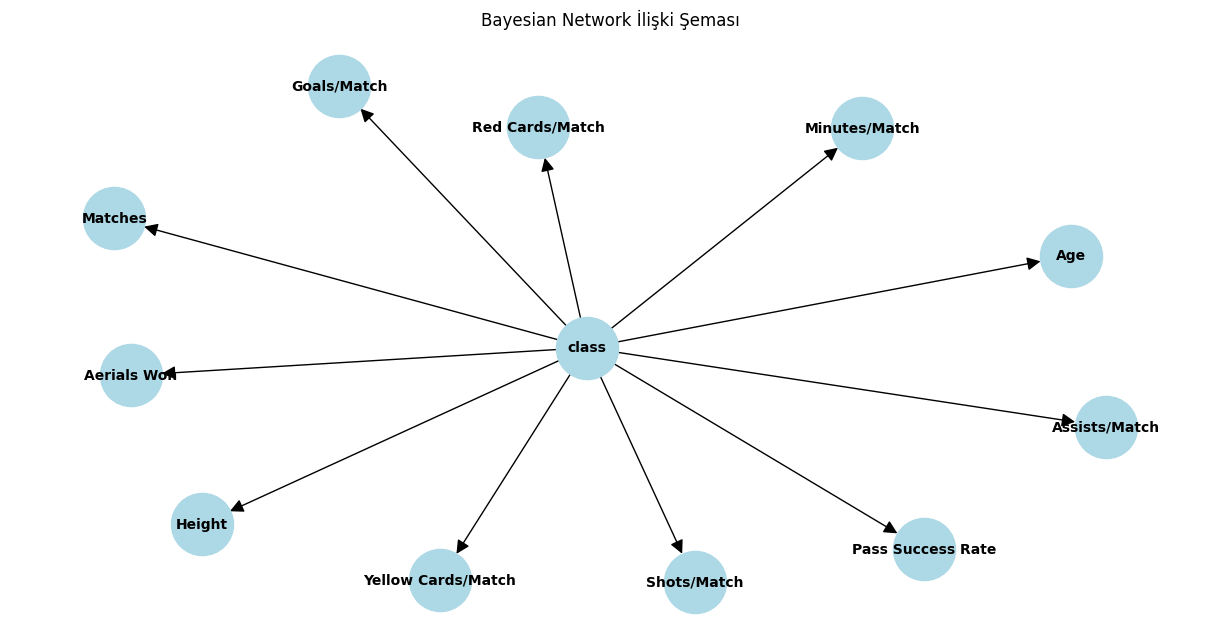

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# NetworkX grafını DiscreteBayesianNetwork modelinden oluştur
G = nx.DiGraph()
G.add_edges_from(model.edges())

# Grafiği çiz
plt.figure(figsize=(12, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue',
        font_size=10, font_weight='bold', arrowsize=20)
plt.title("Bayesian Network İlişki Şeması")
plt.show()
